#Importing Linraries







In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Dataset Summary

In [141]:
#REading the csv file
df=pd.read_csv('/content/termdeposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [142]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [143]:
#cHecking for null values
df.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [144]:
#Shape of dataset
df.shape

(31647, 18)

In [145]:
#column names
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

#Value Counts

In [146]:

for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print('Number of unique data:', df[column].nunique())
        print("Value Counts")
        print(df[column].value_counts())
        print("****************************************************************************************************")

job
Number of unique data: 12
Value Counts
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
****************************************************************************************************
marital
Number of unique data: 3
Value Counts
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
****************************************************************************************************
education
Number of unique data: 4
Value Counts
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
****************************************************************************************************
default
Number of unique data: 2
Value Counts
no     31062
yes      585
Name: defaul

In [147]:
#NO: of categories in column "JOb"
df = df[df['job'] != 'unknown']
df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
Name: job, dtype: int64

In [148]:
#replacing unknown to others since marketing details are important
df['poutcome'] = df['poutcome'].replace('unknown', 'other')
df['poutcome'].value_counts()

other      27036
failure     3346
success     1059
Name: poutcome, dtype: int64

In [149]:
#change unknown to secondary
df['education'] = df['education'].replace('unknown', 'secondary')
df['education'].value_counts()

secondary    17392
tertiary      9278
primary       4771
Name: education, dtype: int64

In [150]:
#Droping the column 'contact'
df = df.drop(columns=['contact'])
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,secondary,no,1933,no,no,19,nov,44,2,-1,0,other,no
2,15320,27,services,married,secondary,no,891,yes,no,18,jul,240,1,-1,0,other,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,4,feb,380,1,-1,0,other,no
5,29390,33,management,single,tertiary,no,0,yes,no,2,feb,116,3,-1,0,other,no


In [151]:
#Droping the column 'ID'
df = df.drop(columns=['ID'])

In [68]:
#Existing columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

#Plots

In [69]:

df['subscribed'].value_counts()

no     27752
yes     3689
Name: subscribed, dtype: int64

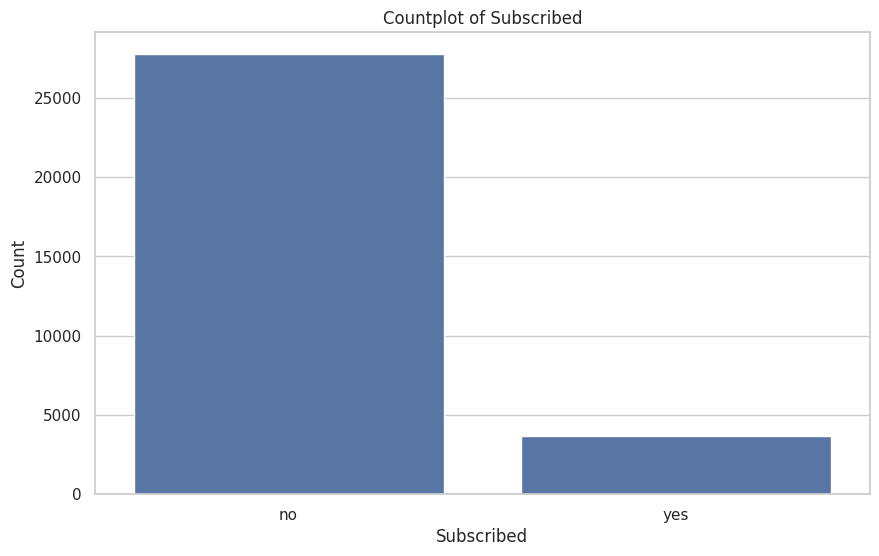

In [70]:
#COunt plot of column 'Subscribed'
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10, 6))
sns.countplot(x='subscribed', data=df)
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.title('Countplot of Subscribed')

plt.show()

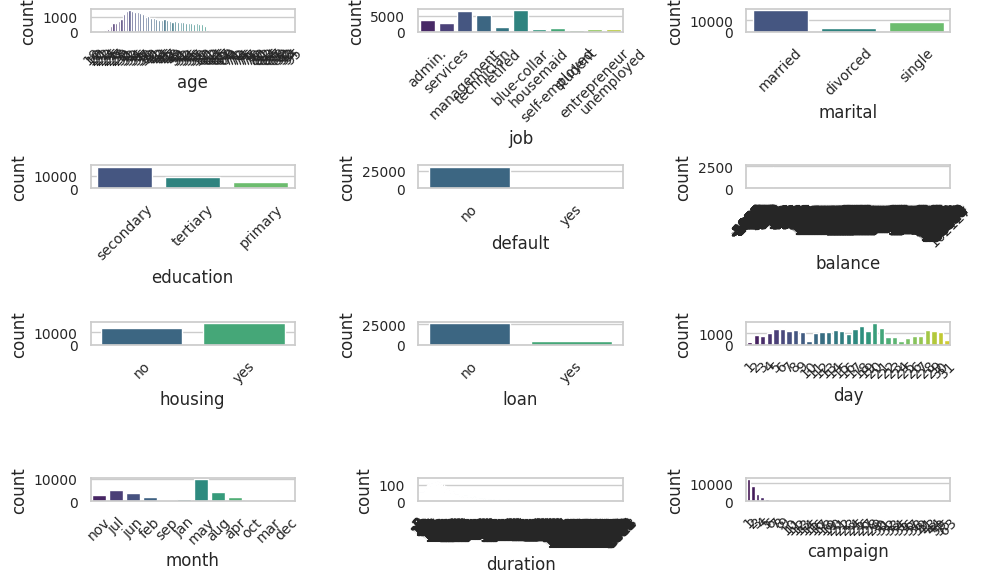

In [71]:
#count plot of existing columns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6), facecolor='white')
plotnumber = 1

for i in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=i, data=df, palette="viridis")
        plt.xlabel(i)
        plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and fontsize as needed
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

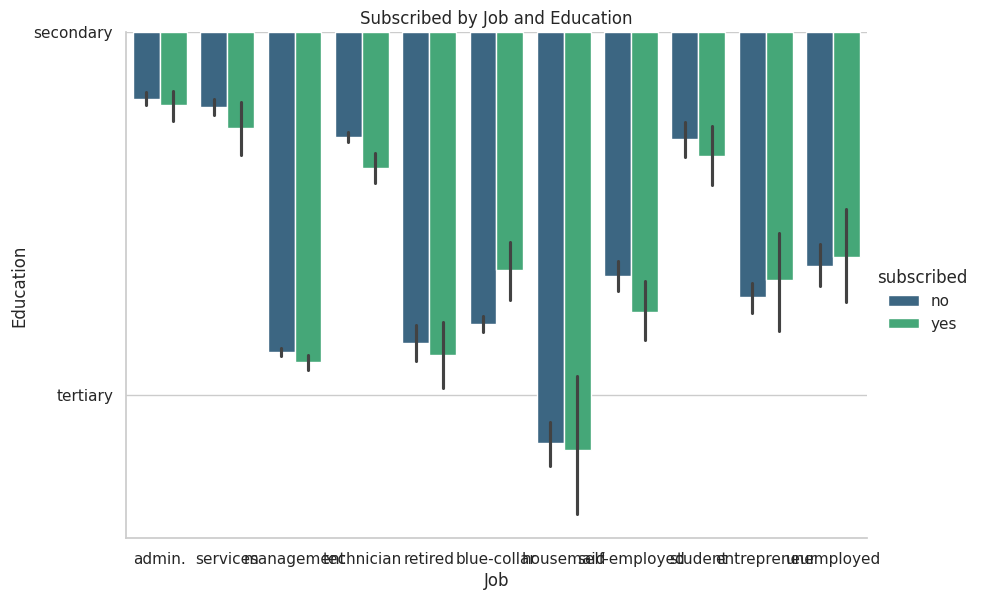

In [72]:
# Creating a categorical plot with job on x-axis, education on y-axis, and hue as subscribed
sns.catplot(x='job', y='education', hue='subscribed', data=df, kind='bar', palette='viridis', height=6, aspect=1.5)

# Set labels and title
plt.xlabel('Job')
plt.ylabel('Education')
plt.title('Subscribed by Job and Education')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Subscribed vs education')

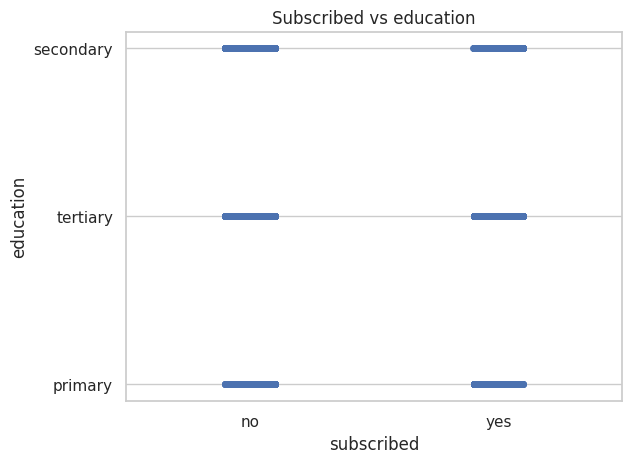

In [73]:
#CReating a Strip plot Subscribed vs education
sns.stripplot(x='subscribed',y='education',data=df)
plt.title('Subscribed vs education')


Text(0.5, 1.0, 'Subscribed vs job')

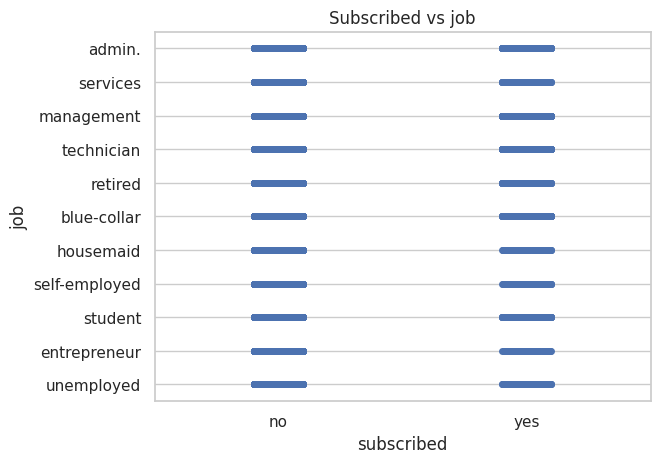

In [74]:
#Creating strip plit Subscribed vs job
sns.stripplot(x='subscribed',y='job',data=df)
plt.title('Subscribed vs job')


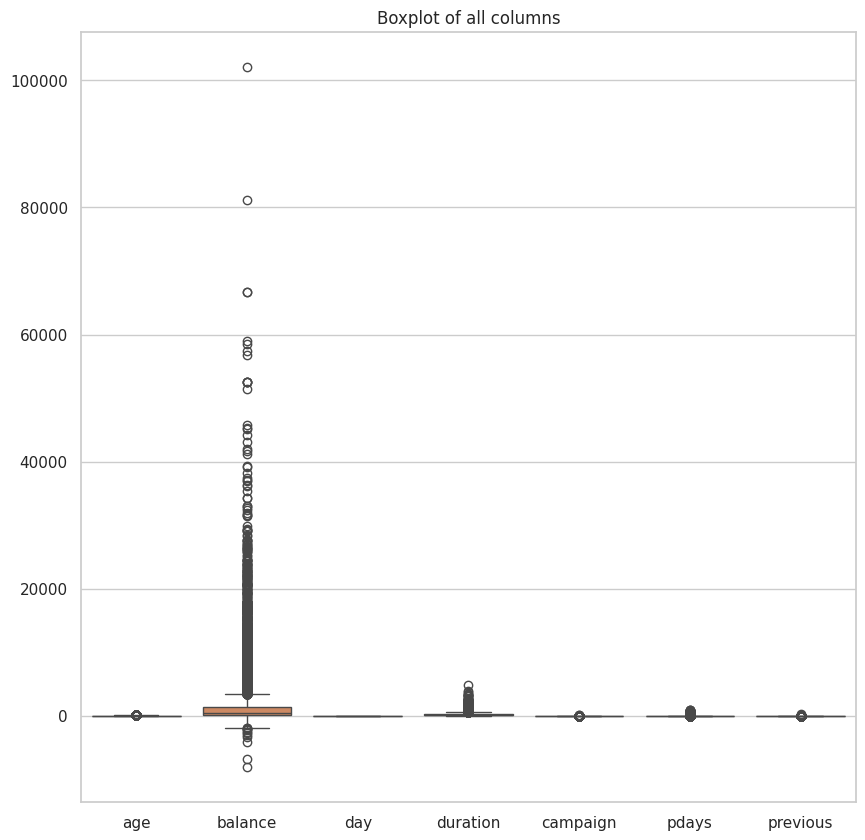

In [75]:
#Box plot of all columns
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.title('Boxplot of all columns')
plt.show()

In [76]:
df.shape

(31441, 16)

#Description of Data

In [77]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31441.000000,31441.000000,31441.000000,31441.000000,31441.000000,31441.000000,31441.000000
mean,40.912853,1362.170446,15.844248,258.236061,2.762158,39.671703,0.575522
std,10.610198,3029.292426,8.334488,257.260419,3.106524,99.411547,2.428395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Label Encoder

In [78]:
#changing cat val to digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

In [138]:
#Mapping of numeric values to original categories:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of numeric values to original categories:")
print(mapping)

Mapping of numeric values to original categories:
{'failure': 0, 'other': 1, 'success': 2}


In [79]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,1,0,1933,0,0,19,9,44,2,-1,0,1,0
2,27,7,1,1,0,891,1,0,18,5,240,1,-1,0,1,0
3,57,4,0,2,0,3287,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,4,3,380,1,-1,0,1,0
5,33,4,2,2,0,0,1,0,2,3,116,3,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,12,8,116,2,-1,0,1,0
31643,53,4,0,2,0,380,0,1,5,6,438,2,-1,0,1,1
31644,32,4,2,2,0,312,0,0,7,1,37,3,-1,0,1,0
31645,57,9,1,1,0,225,1,0,15,8,22,7,337,12,0,0


In [80]:
#Removing Outliers Using IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df1 = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df1.shape


(14860, 16)

<Axes: >

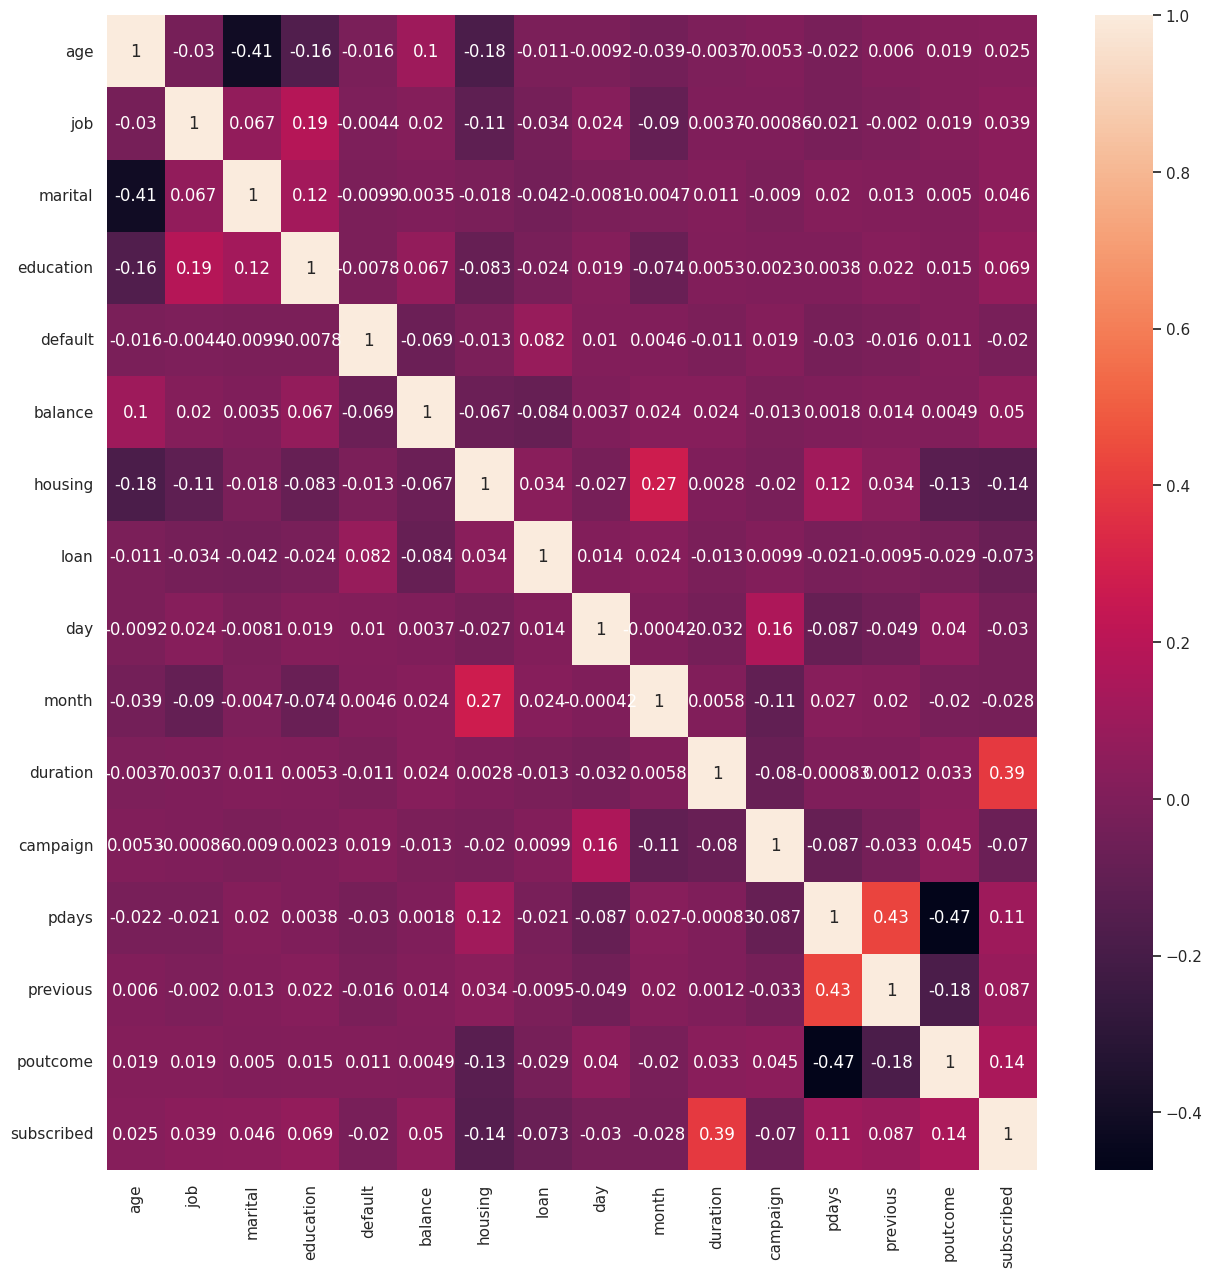

In [81]:
#Heatmap for correlation
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

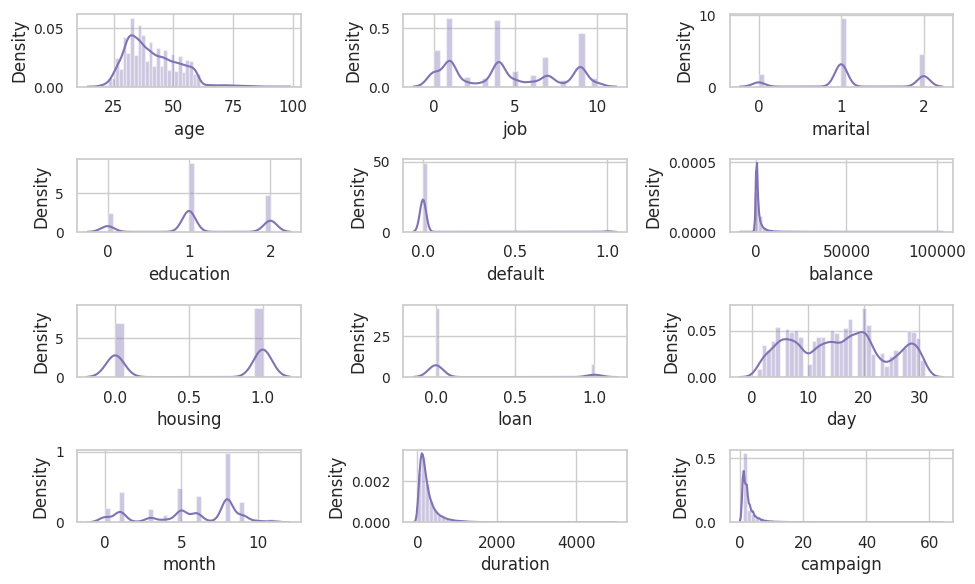

In [82]:
#Distribution plot
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[i], color='m')  # Use histplot instead of displot for individual axes
        plt.xlabel(i)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [83]:
#Selecting feature and target variable
x=df.drop(['subscribed'],axis=1)
y=df['subscribed']

In [84]:
#Standadizing datavalues
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [85]:
x

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,1.421970,-1.324838,-0.275129,-0.219553,-0.137452,0.188440,-1.125392,-0.441406,0.378644,1.153186,-0.832773,-0.245345,-0.409131,-0.237001,0.198109
1,-1.311293,0.837285,-0.275129,-0.219553,-0.137452,-0.155541,0.888579,-0.441406,0.258659,-0.178115,-0.070887,-0.567253,-0.409131,-0.237001,0.198109
2,1.516221,-0.089339,-1.920615,1.312057,-0.137452,0.635416,-1.125392,-0.441406,0.738600,0.154710,2.366371,-0.567253,0.445914,0.998403,2.921655
3,-0.934291,1.455035,-0.275129,-0.219553,-0.137452,-0.410390,0.888579,-0.441406,-1.421135,-0.843766,0.473318,-0.567253,-0.409131,-0.237001,0.198109
4,-0.745790,-0.089339,1.370358,1.312057,-0.137452,-0.449673,0.888579,-0.441406,-1.661106,-0.843766,-0.552896,0.076563,-0.409131,-0.237001,0.198109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31436,-1.122792,-0.089339,1.370358,1.312057,-0.137452,-0.449673,0.888579,-0.441406,-0.461253,0.820361,-0.552896,-0.245345,-0.409131,-0.237001,0.198109
31437,1.139219,-0.089339,-1.920615,1.312057,-0.137452,-0.324230,-1.125392,2.265488,-1.301150,0.154710,0.698774,-0.245345,-0.409131,-0.237001,0.198109
31438,-0.840040,-0.089339,1.370358,1.312057,-0.137452,-0.346677,-1.125392,-0.441406,-1.061180,-1.509417,-0.859983,0.076563,-0.409131,-0.237001,0.198109
31439,1.516221,1.455035,-0.275129,-0.219553,-0.137452,-0.375397,0.888579,-0.441406,-0.101297,0.820361,-0.918291,1.364197,2.990930,4.704613,-2.525437


In [86]:
#Checking for null values
x.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [87]:
#checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.296387,age
1,1.053061,job
2,1.221428,marital
3,1.084157,education
4,1.012575,default
5,1.035075,balance
6,1.171399,housing
7,1.019300,loan
8,1.034223,day
9,1.102635,month


In [88]:
y.value_counts()

0    27752
1     3689
Name: subscribed, dtype: int64

#Over Sampling

In [89]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [90]:
y1.value_counts()

0    27752
1    27752
Name: subscribed, dtype: int64

#Model Selection

In [91]:
#LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=i)
  lc=LogisticRegression()
  lc.fit(x_train,y_train)
  pred=lc.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.8119745375930819 random_state is 34


In [92]:
#Spliting dtaset to train and test
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=maxRs)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [94]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.8119745375930819
[[6932 1438]
 [1693 6589]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      8370
           1       0.82      0.80      0.81      8282

    accuracy                           0.81     16652
   macro avg       0.81      0.81      0.81     16652
weighted avg       0.81      0.81      0.81     16652



In [95]:
# RandomForestClassification
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.9445712226759548
[[7749  621]
 [ 302 7980]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8370
           1       0.93      0.96      0.95      8282

    accuracy                           0.94     16652
   macro avg       0.95      0.94      0.94     16652
weighted avg       0.95      0.94      0.94     16652



In [96]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8564136440067259
[[6847 1523]
 [ 868 7414]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      8370
           1       0.83      0.90      0.86      8282

    accuracy                           0.86     16652
   macro avg       0.86      0.86      0.86     16652
weighted avg       0.86      0.86      0.86     16652



In [97]:
#using GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.9179678116742733
[[7596  774]
 [ 592 7690]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8370
           1       0.91      0.93      0.92      8282

    accuracy                           0.92     16652
   macro avg       0.92      0.92      0.92     16652
weighted avg       0.92      0.92      0.92     16652



In [98]:
# Using AdaBoost Classifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.8828969493153975
[[7428  942]
 [1008 7274]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      8370
           1       0.89      0.88      0.88      8282

    accuracy                           0.88     16652
   macro avg       0.88      0.88      0.88     16652
weighted avg       0.88      0.88      0.88     16652



In [99]:
#Using Bagging Classifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.9287773240451598
[[7761  609]
 [ 577 7705]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8370
           1       0.93      0.93      0.93      8282

    accuracy                           0.93     16652
   macro avg       0.93      0.93      0.93     16652
weighted avg       0.93      0.93      0.93     16652



In [100]:
#Using Extra Tree Classifier
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.8857794859476339
[[7269 1101]
 [ 801 7481]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8370
           1       0.87      0.90      0.89      8282

    accuracy                           0.89     16652
   macro avg       0.89      0.89      0.89     16652
weighted avg       0.89      0.89      0.89     16652



In [101]:
#Using KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Make predictions
pred_knn = knn.predict(x_test)

# Print evaluation metrics
print("\nK-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_score(y_test, pred_knn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, pred_knn)}")


K-Nearest Neighbors (KNN):
Accuracy: 0.9186283929858275
Confusion Matrix:
[[7093 1277]
 [  78 8204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      8370
           1       0.87      0.99      0.92      8282

    accuracy                           0.92     16652
   macro avg       0.93      0.92      0.92     16652
weighted avg       0.93      0.92      0.92     16652



#Cross Validation

In [102]:
#check cv score for logistic regression

score=cross_val_score(lg,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_lg) - score.mean())

[0.80614359 0.80974687 0.80217998 0.80794523 0.80540541]
0.8062842159337971
Difference between accuracy score and cross valication score is 0.005690321659284847


In [103]:
#check cv score for randomforest

score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.90316426 0.90473919 0.89965013 0.90521628 0.90219466]
0.9029929019002847
Difference between accuracy score and cross valication score is 0.04157832077567014


In [104]:
#check cv score for svc

score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.89903005 0.90108142 0.89631043 0.89917303 0.89678753]
0.898476493955074
Difference between accuracy score and cross valication score is -0.04206284994834808


In [105]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.90634441 0.90601145 0.90028626 0.89980916 0.90283079]
0.9030564139818423
Difference between accuracy score and cross valication score is 0.014911397692430994


In [106]:
#check cv score for Adaboost

score=cross_val_score(Ada,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.89743997 0.8985369  0.89312977 0.8985369  0.89694656]
0.8969180203570433
Difference between accuracy score and cross valication score is -0.014021071041645738


In [107]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.89219272 0.89774173 0.89694656 0.89917303 0.89503817]
0.8962184417074605
Difference between accuracy score and cross valication score is 0.032558882337699324


In [108]:
#check cv score for Extra tree Classifier

score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.86166322 0.85814249 0.86354962 0.85766539 0.84812341]
0.8578288275056775
Difference between accuracy score and cross valication score is 0.027950658441956433


In [109]:
scores = cross_val_score(knn, x, y, cv=5)

# Print cross-validation scores
print(scores)
print(scores.mean())

print("Difference between accuracy score and cross-validation score is", accuracy_score(y_test, pred_knn) - scores.mean())

[0.8877405  0.88979008 0.88819975 0.89249364 0.89122137]
0.8898890667780126
Difference between accuracy score and cross-validation score is 0.02873932620781494


gradient boosing perfoms the best

#ROC Curve

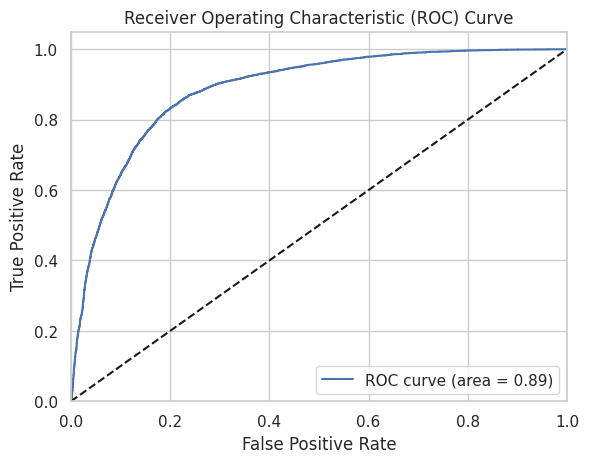

In [171]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = lg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [116]:
GVC = GridSearchCV(GB, hyperparameters, cv=5, scoring='accuracy',verbose=2)


In [117]:
GVC.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=  12.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [118]:
GVC.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}

In [119]:
final_model=GradientBoostingClassifier(learning_rate= 0.2, max_depth=7, n_estimators=150)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

94.76939706942109


#Prediction on Test Data

In [153]:
test_df=pd.read_csv('/content/termdeposit_test.csv')

In [154]:
test_df.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [155]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [157]:
for column in test_df.columns:
    if test_df[column].dtype == 'object':
        print(column)
        print('Number of unique data:', test_df[column].nunique())
        print("Value Counts")
        print(test_df[column].value_counts())
        print("****************************************************************************************************")

job
Number of unique data: 12
Value Counts
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
****************************************************************************************************
marital
Number of unique data: 3
Value Counts
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
****************************************************************************************************
education
Number of unique data: 4
Value Counts
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
****************************************************************************************************
default
Number of unique data: 2
Value Counts
no     13334
yes      230
Name: default, dtyp

In [158]:
test_df = test_df[test_df['job'] != 'unknown']
test_df['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
Name: job, dtype: int64

In [159]:
test_df['poutcome'] = test_df['poutcome'].replace('unknown', 'other') #replacing unknown to others since marketing details are important
test_df['poutcome'].value_counts()

other      11506
failure     1535
success      441
Name: poutcome, dtype: int64

In [160]:
test_df['education'] = test_df['education'].replace('unknown', 'secondary') #change unknown to secondary
test_df['education'].value_counts()

secondary    7469
tertiary     3984
primary      2029
Name: education, dtype: int64

In [161]:
test_df = test_df.drop(columns=['contact','ID'])
test_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,15,may,20,6,-1,0,other
1,78,retired,divorced,primary,no,2787,no,no,1,jul,372,1,-1,0,other
2,31,self-employed,single,tertiary,no,144,yes,no,16,may,676,1,-1,0,other
3,57,services,single,primary,no,3777,yes,no,13,may,65,2,-1,0,other
4,45,blue-collar,divorced,secondary,no,-705,no,yes,3,jul,111,1,-1,0,other


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in test_df.columns:
    if test_df[col].dtype == 'O':
        test_df[col] = le.fit_transform(test_df[col])

In [163]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,15,8,20,6,-1,0,1
1,78,5,0,0,0,2787,0,0,1,5,372,1,-1,0,1
2,31,6,2,2,0,144,1,0,16,8,676,1,-1,0,1
3,57,7,2,0,0,3777,1,0,13,8,65,2,-1,0,1
4,45,1,0,1,0,-705,0,1,3,5,111,1,-1,0,1


In [164]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_df=pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

In [165]:
predictions = final_model.predict(test_df)

In [166]:
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [167]:
test_df['subscribed'] = predictions
test_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,-0.835492,0.827842,-0.276066,-0.222439,-0.131742,-0.401007,0.888398,-0.431111,-0.089679,0.828311,-0.921412,1.059856,-0.419216,-0.298051,0.216884,0
1,3.507932,0.211129,-1.912079,-1.756415,-0.131742,0.465098,-1.125622,-0.431111,-1.779313,-0.167316,0.438880,-0.573768,-0.419216,-0.298051,0.216884,1
2,-0.929914,0.519486,1.359946,1.311537,-0.131742,-0.392570,0.888398,-0.431111,0.031009,0.828311,1.613678,-0.573768,-0.419216,-0.298051,0.216884,1
3,1.525064,0.827842,1.359946,-1.756415,-0.131742,0.786358,0.888398,-0.431111,-0.331055,0.828311,-0.747511,-0.247043,-0.419216,-0.298051,0.216884,1
4,0.391997,-1.022298,-1.912079,-0.222439,-0.131742,-0.668075,-1.125622,2.319591,-1.537937,-0.167316,-0.569746,-0.573768,-0.419216,-0.298051,0.216884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13477,-0.174536,-0.097228,-0.276066,1.311537,-0.131742,-0.424696,-1.125622,-0.431111,1.479267,-1.494819,-0.426761,0.406407,-0.419216,-0.298051,0.216884,1
13478,1.241798,-1.022298,-0.276066,-1.756415,-0.131742,0.300898,0.888398,-0.431111,0.513762,0.164559,-0.388116,-0.573768,-0.419216,-0.298051,0.216884,1
13479,-0.552225,0.211129,-0.276066,-1.756415,-0.131742,-0.346815,0.888398,-0.431111,1.599955,-0.499192,-0.473134,-0.573768,-0.419216,-0.298051,0.216884,1
13480,-1.118759,-1.330655,1.359946,-0.222439,-0.131742,-0.288728,-1.125622,-0.431111,-0.813808,1.160186,-0.194892,-0.247043,0.481161,1.199460,2.889676,1


In [168]:
test_df['subscribed'].value_counts()

1    12256
0     1226
Name: subscribed, dtype: int64